In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [19]:
cars = pd.read_csv("car.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [20]:
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [21]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [22]:
cars.shape

(205, 26)

In [23]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [24]:
cars.duplicated().sum()

0

In [25]:
cars.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [26]:
cars.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

- The dataset encompasses information on 205 distinct car models, each characterized by unique attributes.
- Cars in the dataset exhibit variations in size, weight, and engine capacities.
- The price range for the cars extends from a minimum of 5,118 to a maximum of \$45,400.
- On average, the car prices in the dataset hover around $13,276.
- Engine specifications vary, including differences in bore diameter (bore ratio) and stroke length.

## Exploratory Data Analysis

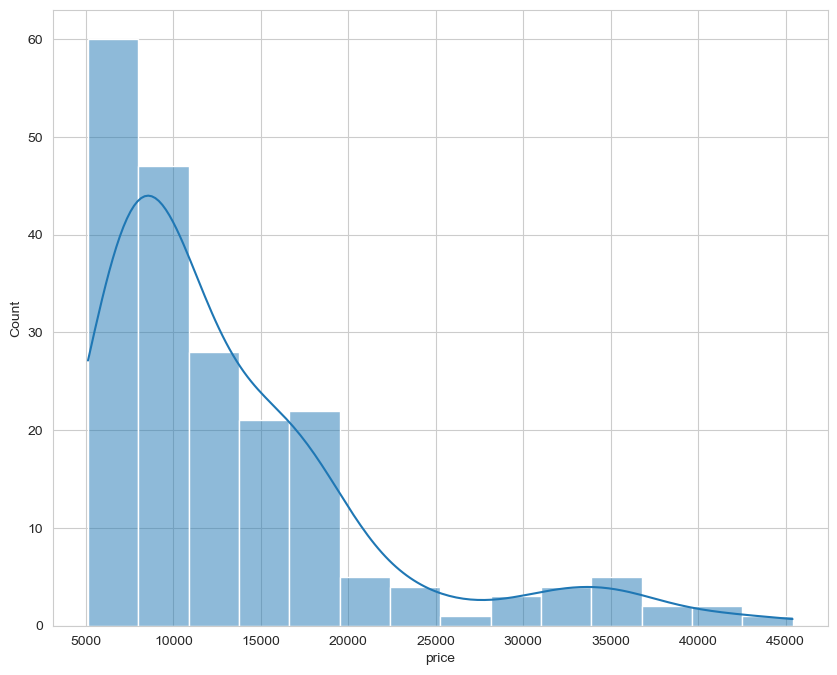

In [27]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
sns.histplot(cars['price'], kde=True)
plt.show()

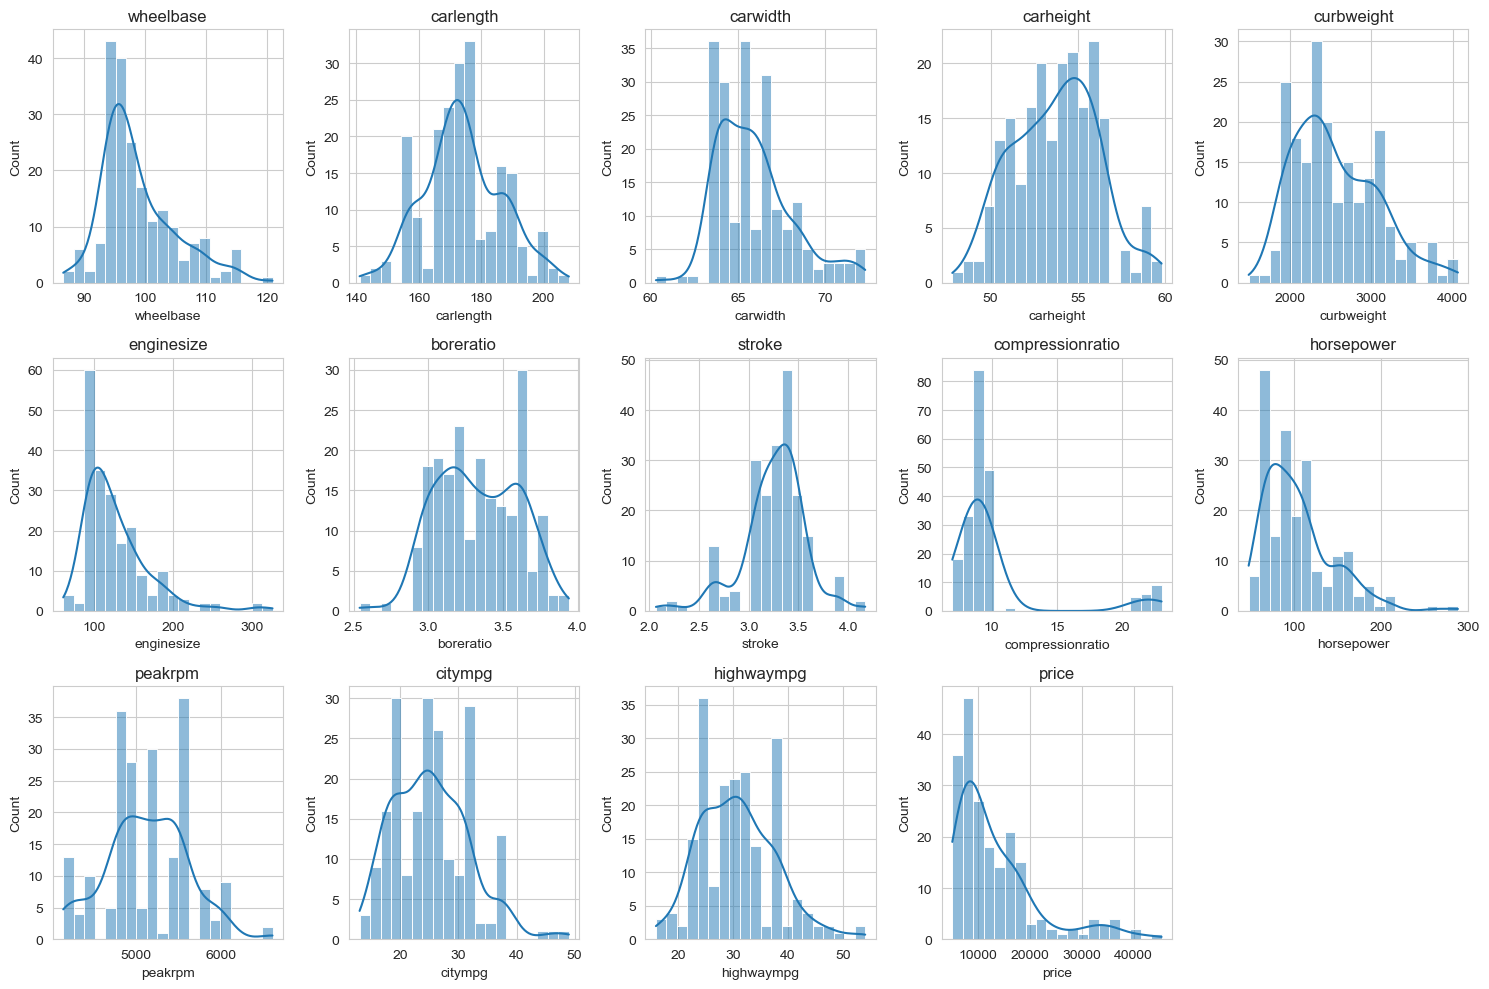

In [28]:
numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 5, i)
    sns.histplot(data=cars, x=feature, bins=20, kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

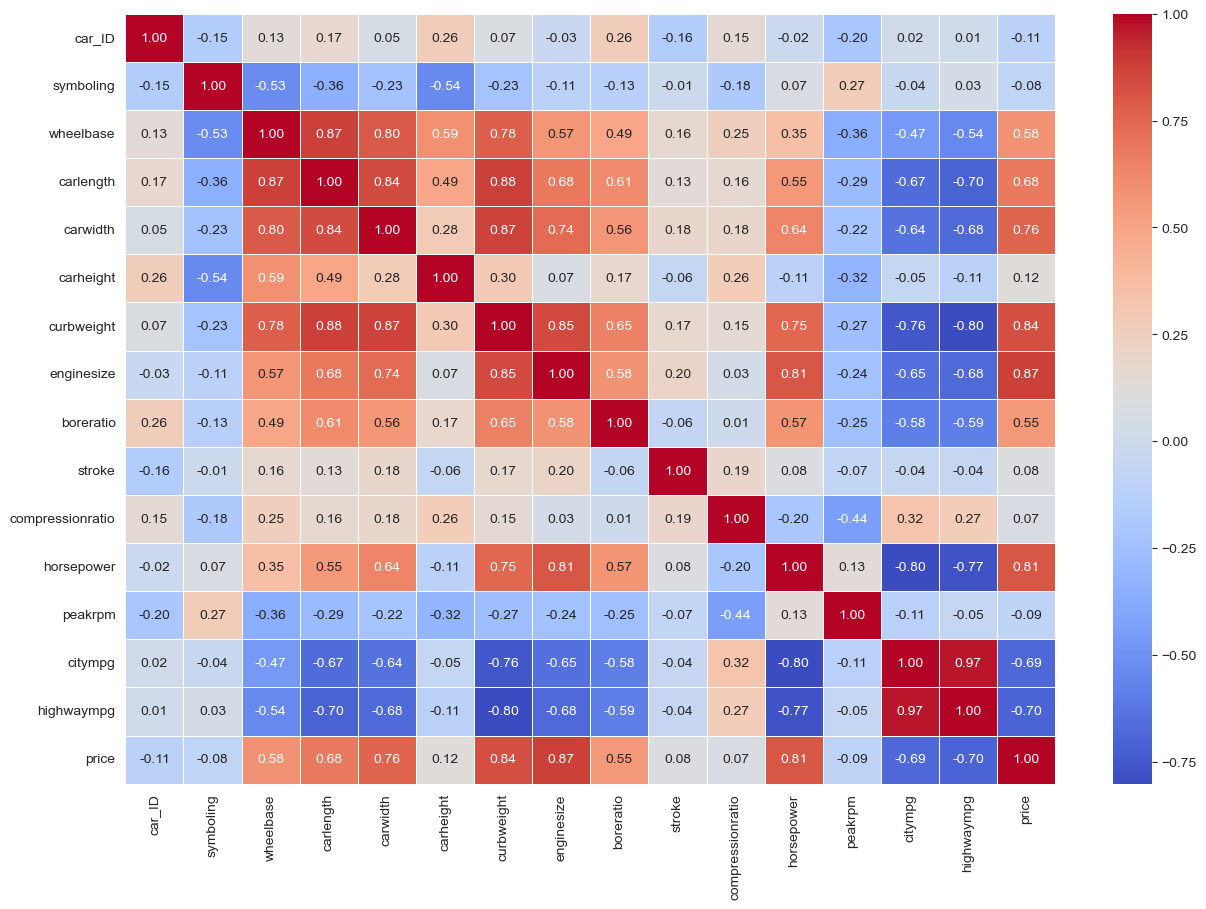

In [29]:
plt.figure(figsize=(15, 10))
numeric_columns = cars.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = cars[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

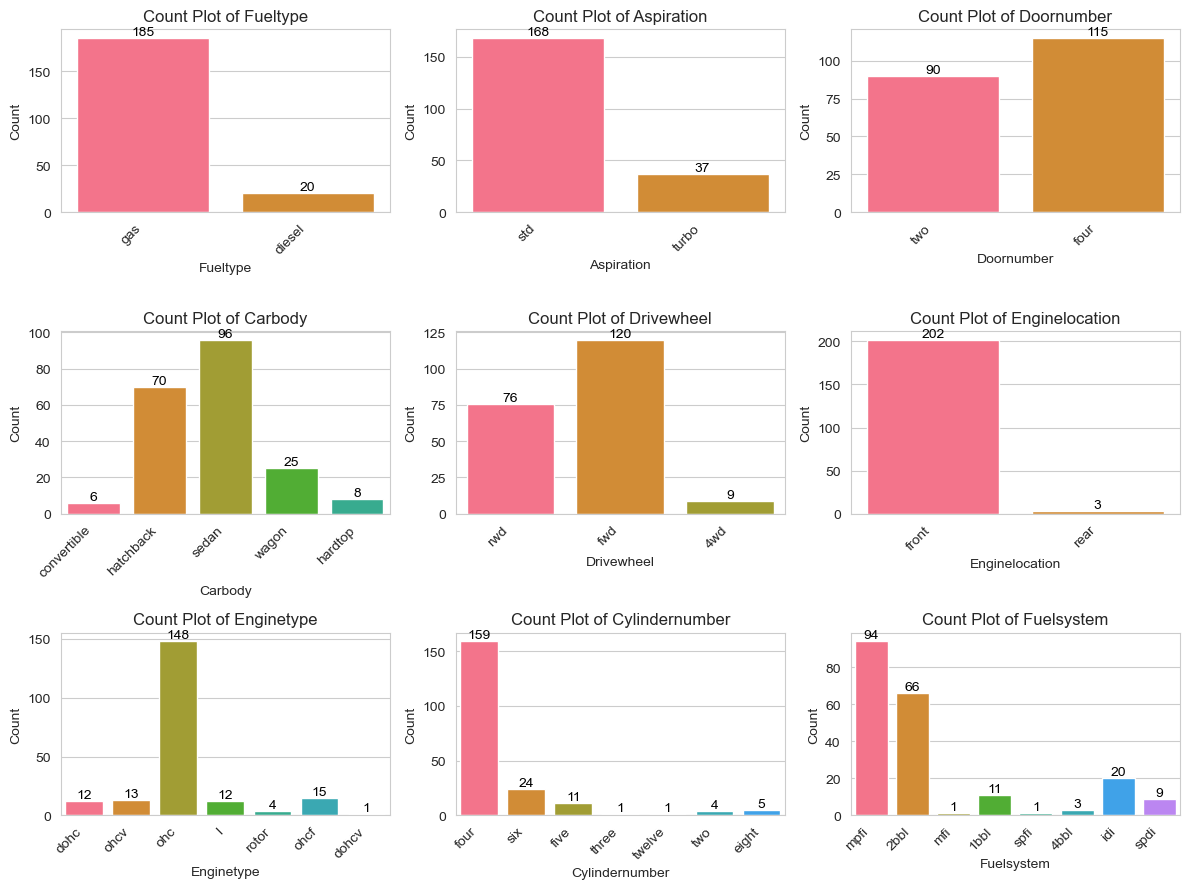

In [30]:
# Define the list of categorical columns to analyze
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
axes = axes.ravel() 

# Custom color palette using husl_palette
custom_palette = sns.husl_palette(n_colors=len(categorical_columns))

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=cars[column], data=cars, palette=custom_palette, ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}', fontsize=12)
    axes[i].set_xlabel(column.capitalize(), fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

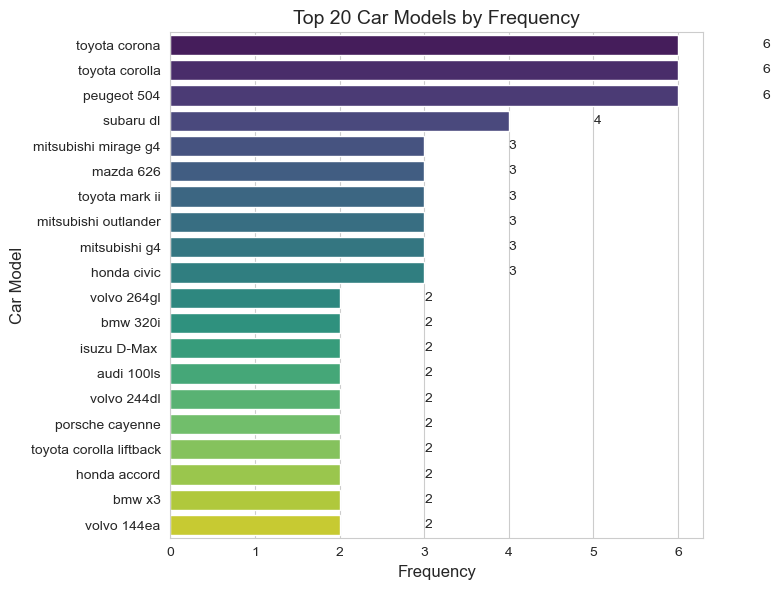

In [31]:
# Number of top car models to plot
n = 20

# Get the top car models
top_car_models = cars['CarName'].value_counts().head(n)

# Create a custom color palette
colors = sns.color_palette("viridis", n)

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=top_car_models.values, y=top_car_models.index, palette=colors)

# Add annotations for each bar
for i, (value, name) in enumerate(zip(top_car_models.values, top_car_models.index)):
    ax.text(value + 1, i, f'{value}', ha='left', va='center', fontsize=10)

plt.title(f'Top {n} Car Models by Frequency', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Car Model', fontsize=12)
plt.tight_layout()
plt.show()

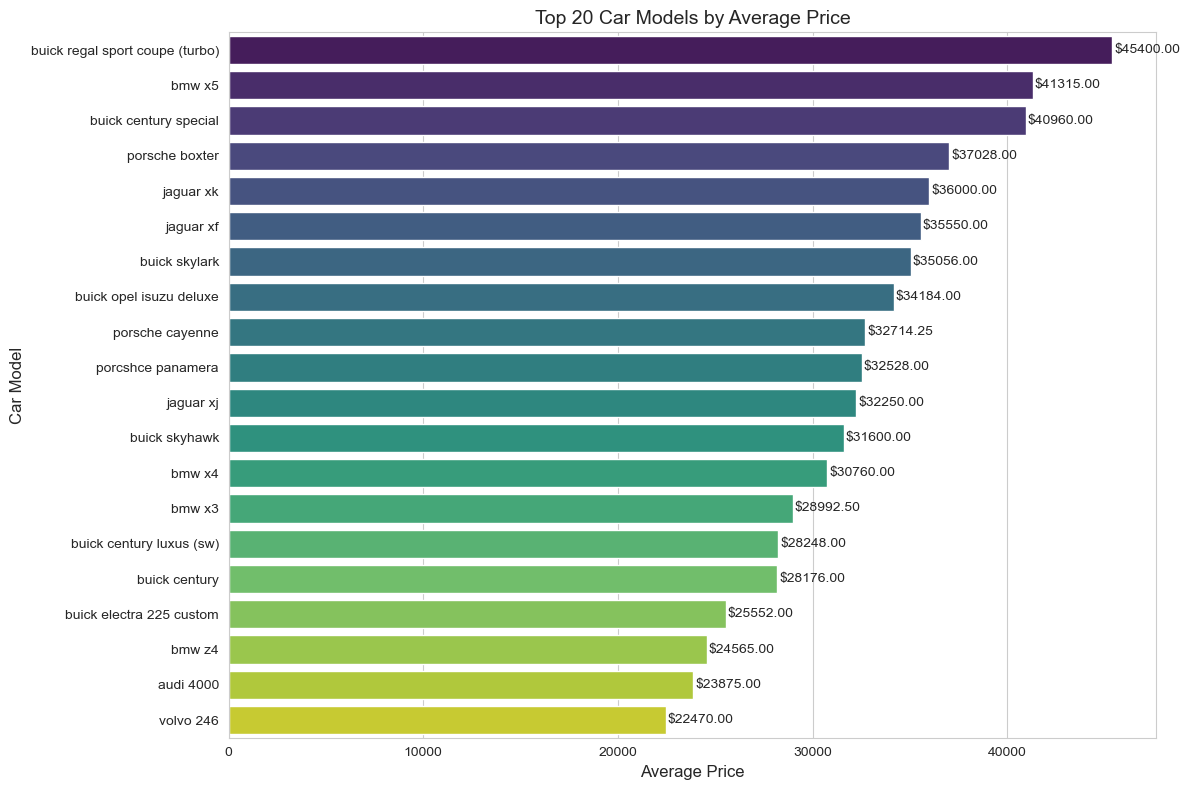

In [32]:
# Calculate average price for each car model
avg_prices_by_car = cars.groupby('CarName')['price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

# Create a custom color palette
colors = sns.color_palette("viridis", n)

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_car_models.values, y=top_car_models.index, palette=colors)

# Add annotations for each bar
for i, (value, name) in enumerate(zip(top_car_models.values, top_car_models.index)):
    ax.text(value + 100, i, f'${value:.2f}', ha='left', va='center', fontsize=10)

plt.title(f'Top {n} Car Models by Average Price', fontsize=14)
plt.xlabel('Average Price', fontsize=12)
plt.ylabel('Car Model', fontsize=12)
plt.tight_layout()
plt.show()

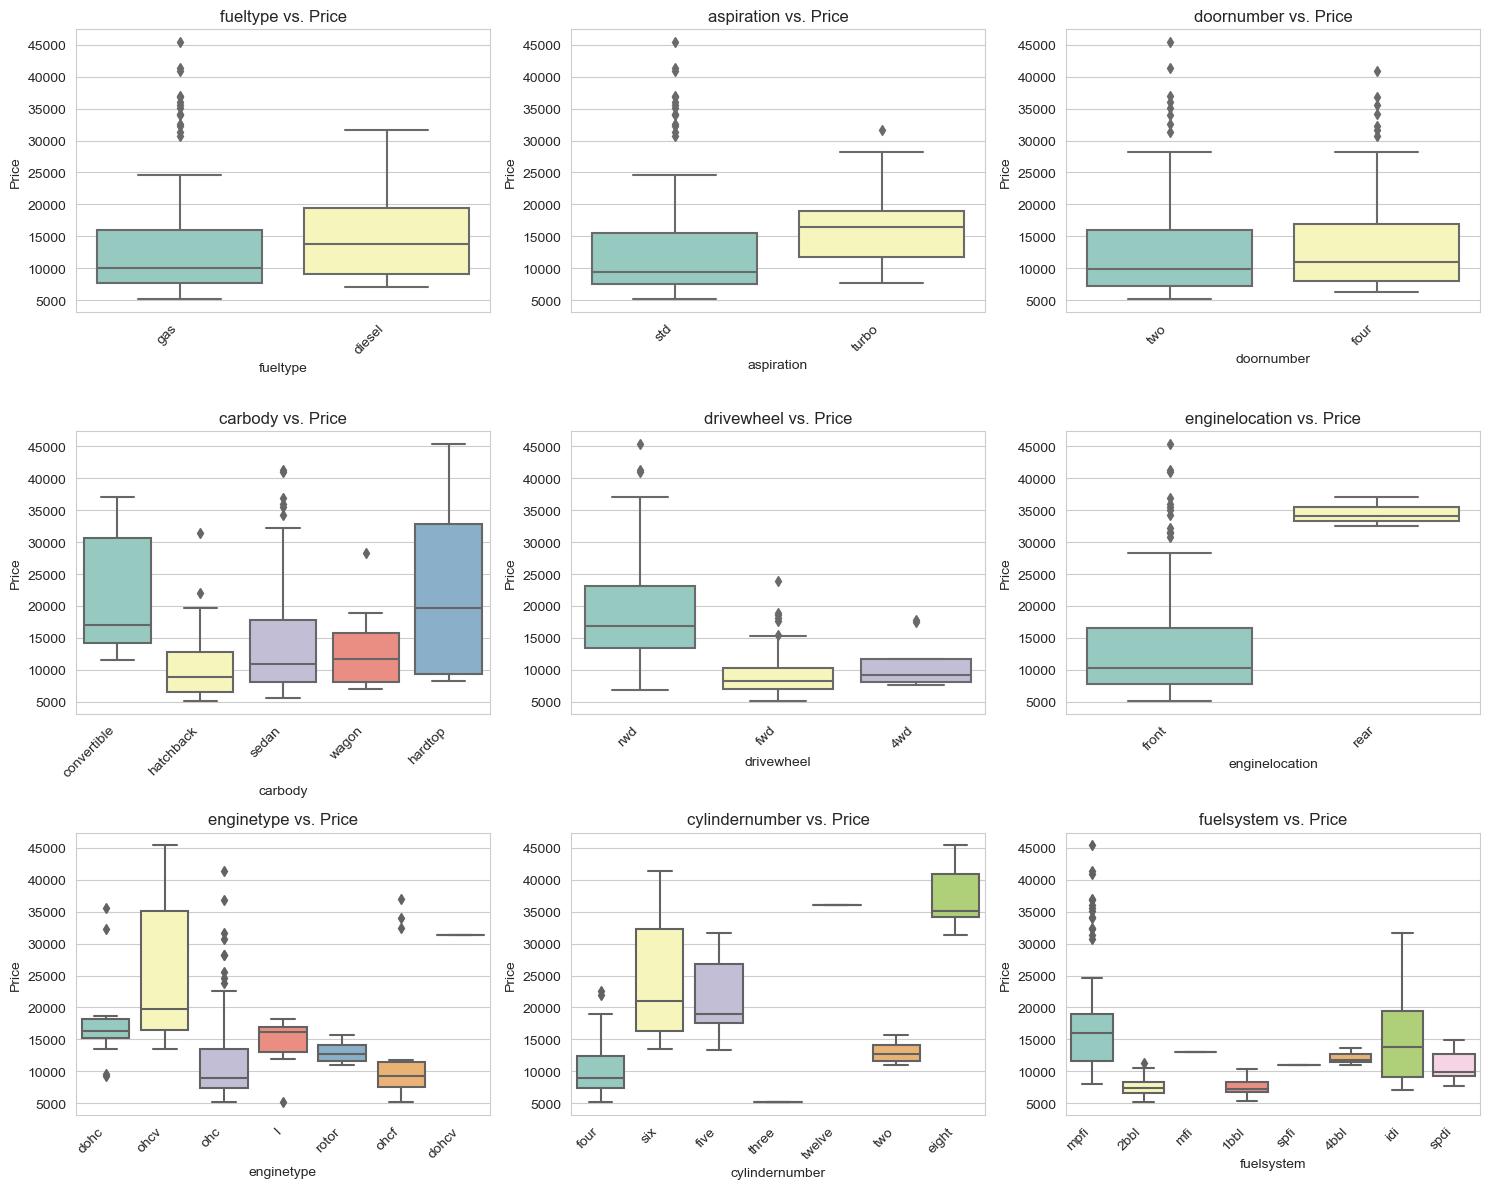

In [33]:
plt.figure(figsize=(15, 12))

# Custom color palette
custom_palette = sns.color_palette("Set3")

for i, feature in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=cars, x=feature, y='price', palette=custom_palette)
    plt.title(f'{feature} vs. Price', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Price', fontsize=10)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

- The Toyota stands out as a popular and frequently chosen car model.
- About 90% of users prefer cars powered by gas, and, on average, these cars are more affordable than their diesel counterparts.
- While only a small percentage (10%) opt for diesel-powered cars, they tend to come with a higher average price than gas-powered ones.
- The majority of cars (81%) are non-turbo, and these cars generally have a lower average price. Turbocharged cars make up the remaining 18%.
- Around 55% of users drive cars with 4 doors, while 45% opt for 2 doors; interestingly, sports cars maintain a similar average price regardless of door count.
- Sedans are the preferred car type for most people, but higher-priced options like Convertibles and Hardtops also enjoy popularity.
- The majority of users (Front-Wheel Drive (fwd)]> for their cars, possibly due to its lower price.
- The "ohc" engine type is the most common and is associated with lower prices.
- A whopping 97% of users prefer their engines at the front rather than the back.

## Feature Engineering

In [35]:
# Define categorical and numerical columns
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand', 'model']
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

In [36]:
# Identify and handle outliers
Q1 = cars[numerical_columns].quantile(0.25)
Q3 = cars[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
cars_no_outliers = cars[~((cars[numerical_columns] < (Q1 - 1.5 * IQR)) | (cars[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [37]:
# Extract brand and model from CarName
cars['brand'] = cars['CarName'].apply(lambda x: x.split(' ')[0])
cars['model'] = cars['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# Define categorical and numerical columns
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand', 'model']
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

# Encoding categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    cars[column] = label_encoder.fit_transform(cars[column])

# Feature engineering
cars['power_to_weight_ratio'] = cars['horsepower'] / cars['curbweight']
cars['horsepower_peakrpm_interaction'] = cars['horsepower'] * cars['peakrpm']
for column in numerical_columns:
    cars[f'{column}_squared'] = cars[column] ** 2
cars['log_enginesize'] = np.log(cars['enginesize'] + 1)

# Feature scaling
scaler = StandardScaler()
cars[numerical_columns + ['horsepower_peakrpm_interaction']] = scaler.fit_transform(
    cars[numerical_columns + ['horsepower_peakrpm_interaction']])

In [38]:
# Splitting into features (X) and target variable (y)
X = cars.drop(['price', 'CarName'], axis=1)
y = cars['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear Regression

In [39]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test, y_pred)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.8601202827687668
Mean Squared Error: 11042667.317743085


#### XGBoost

In [40]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)

# Evaluation metrics
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2_square = r2_score(y_test, xgb_y_pred)
print(f"XGBoost - R-squared: {xgb_r2_square}")
print(f'XGBoost - Mean Squared Error: {xgb_mse}')

XGBoost - R-squared: 0.9292609906053824
XGBoost - Mean Squared Error: 5584421.834654994


#### Decision Tree

In [42]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

# Evaluation metrics
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2_square = r2_score(y_test, dt_y_pred)
print(f"Decision Tree - R-squared: {dt_r2_square}")
print(f'Decision Tree - Mean Squared Error: {dt_mse}')

Decision Tree - R-squared: 0.8815848831154354
Decision Tree - Mean Squared Error: 9348165.459802171


#### Random Forest

In [44]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Evaluation metrics
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2_square = r2_score(y_test, rf_y_pred)
print(f"Random Forest - R-squared: {rf_r2_square}")
print(f'Random Forest - Mean Squared Error: {rf_mse}')

Random Forest - R-squared: 0.9571809712316617
Random Forest - Mean Squared Error: 3380306.3011343675


#### Ridge Regression

In [45]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)

# Evaluation metrics
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2_square = r2_score(y_test, ridge_y_pred)
print(f"Ridge Regression - R-squared: {ridge_r2_square}")
print(f'Ridge Regression - Mean Squared Error: {ridge_mse}')

Ridge Regression - R-squared: 0.8723670035628429
Ridge Regression - Mean Squared Error: 10075861.935668202


In [ ]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N features
top_n = 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(top_n), palette='viridis')
plt.title(f'Top {top_n} Features - Random Forest')
plt.show()

In [46]:
# Save the best model
import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']